In [1]:
import sys
sys.path.append('..')

import os

import cv2
import numpy as np
import pydicom
import matplotlib.pyplot as plt

from ipywidgets.widgets import interact, IntSlider, fixed
import ipywidgets as widgets

from src.visualisation import PatientSnapshot
from src.segmentation import threshold_segmentation
from src.segmentation import morph_snakes_segmentation
from src.utils import remove_legs, are_legs

If you use TorchIO for your research, please cite the following paper:

Pérez-García et al., TorchIO: a Python library for efficient loading,
preprocessing, augmentation and patch-based sampling of medical images
in deep learning
(https://arxiv.org/abs/2003.04696)


In [2]:
patient_path = '../data/1/'
patient = PatientSnapshot.from_path(patient_path, mask_path=None)

In [3]:
%%time

patient.snapshot = remove_legs(patient.snapshot)

CPU times: user 15.5 ms, sys: 13.3 ms, total: 28.8 ms
Wall time: 117 ms


## Threshold segmentation

In [4]:
%%time

mask = threshold_segmentation(patient.snapshot)
patient.snapshot_mask = mask

CPU times: user 1.29 s, sys: 850 ms, total: 2.14 s
Wall time: 2.14 s


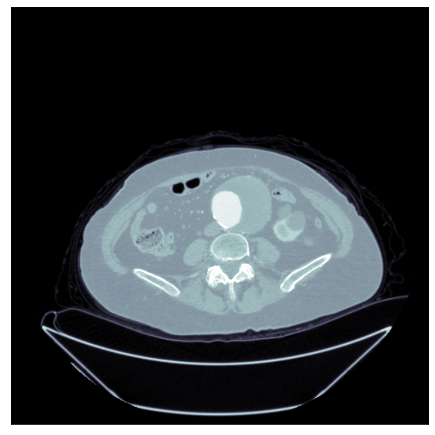

In [5]:
# Static plot
patient.horizontal_plot(z=200, vmin=-1000, vmax=500, plot_mask=True)

In [6]:
# Interactive plot
interact(patient.horizontal_plot, 
         z=IntSlider(min=0, max=patient.shape[0]-1, value=581, continious_update=False), 
         vmin=IntSlider(min=-1000, max=1000, value=-1000, continious_update=False), 
         vmax=IntSlider(min=-1000, max=1000, value=500, continious_update=False),
)

interactive(children=(IntSlider(value=536, description='z', max=536), IntSlider(value=-1000, description='vmin…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

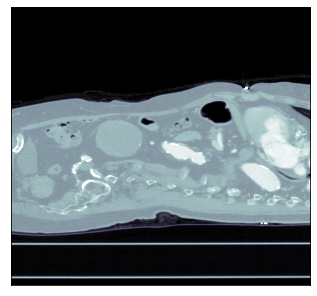

In [7]:
patient.longitudinal_plot(x=300, vmin=-1000, vmax=500, plot_mask=True)

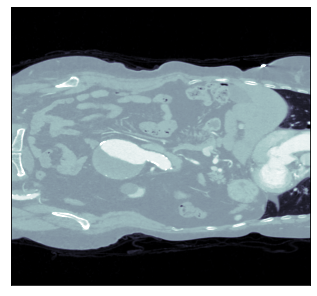

In [8]:
patient.frontal_plot(y=250, vmin=-1000, vmax=500, plot_mask=True)

In [9]:
# threshold = 300
# aspectratio = dict(x=1, y=1, z=1)
# patient.plot_3d(threshold, aspectratio=aspectratio)

## Morphological snakes segmentation

In [ ]:
aneurism_center = (240, 260)
radius = 20
num_iterations = 150
z = 200
mask = morph_snakes_segmentation(patient.snapshot,
                                start_point=aneurism_center,
                                radius=radius,
                                num_iterations=num_iterations,
                                z=z)


In [ ]:
patient.horizontal_plot(z=200, vmin=-1000, vmax=500, plot_mask=True)

In [ ]:
patient.horizontal_plot(z=200, vmin=-1000, vmax=500, plot_mask=True)